In [ ]:
#hide
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [ ]:
import os
os.chdir('../../')
os.getcwd()

'/home/me/github/RSF'

# Locating a Ball with Segmentation Networks

> Using FCN and DeepLabV3 to locate a football.

## Preparation

### Load Images

In [ ]:
from PIL import Image
import glob

im_paths = glob.glob('./data/samples/**.jpg', recursive=True)
images = [Image.open(path) for path in im_paths]

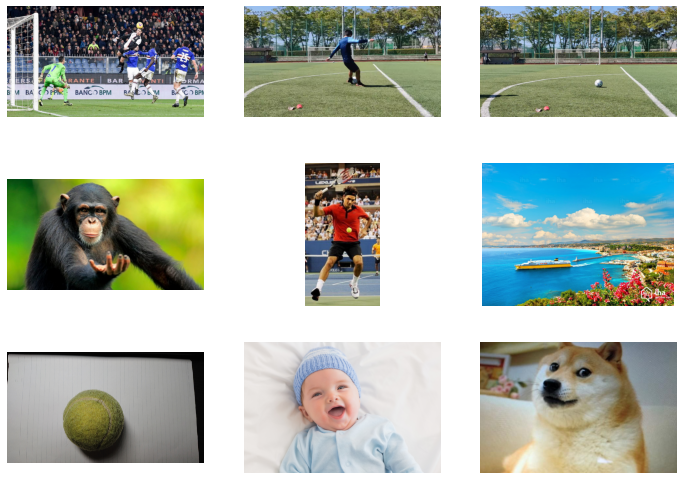

In [ ]:
from ball_detection.utils import plot_images
plot_images(images)

In [ ]:
import torch
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

X = torch.stack([transform(im) for im in images]) 

## Deeplabv3

In [ ]:
from torchvision.models.segmentation import deeplabv3_resnet101
from torchvision.models.segmentation.deeplabv3 import DeepLabHead

model = deeplabv3_resnet101(pretrained=True)

In [ ]:
if torch.cuda.is_available():
    X = X.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(X)['out']
    
output_predictions = output.argmax(1)

{0, 15}
{0, 15}
{0}
{0, 15}
{0, 15}
{0}
{0}
{0, 15}
{0, 12}


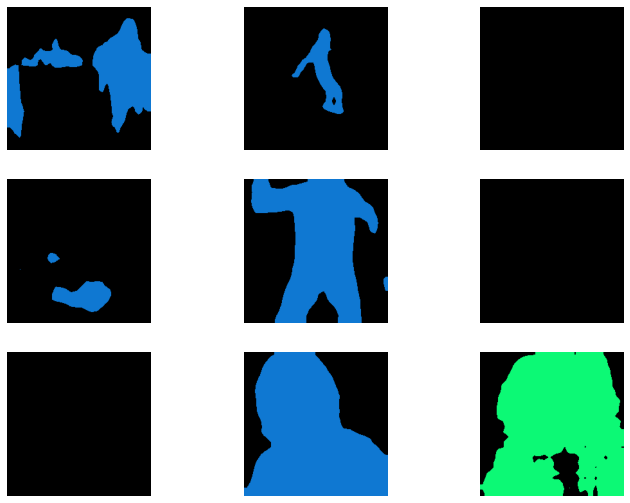

In [ ]:
import numpy as np

palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

r = output_predictions.byte().cpu().numpy()

images = []
for x in r:
    im = Image.fromarray(x) 
    im.putpalette(colors)
    images.append(im)
    print(set(np.asarray(im).ravel()))
    
plot_images(images)

### fcn_resnet101

In [ ]:
from torchvision.models.segmentation import fcn_resnet101

model = fcn_resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /home/me/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 208M/208M [00:01<00:00, 110MB/s]  


In [ ]:
if torch.cuda.is_available():
    X = X.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(X)['out']
    
output_predictions = output.argmax(1)

{0, 15}
{0, 15}
{0}
{0, 3, 12, 15}
{0, 15}
{0}
{0}
{0, 15}
{0, 17, 10, 12}


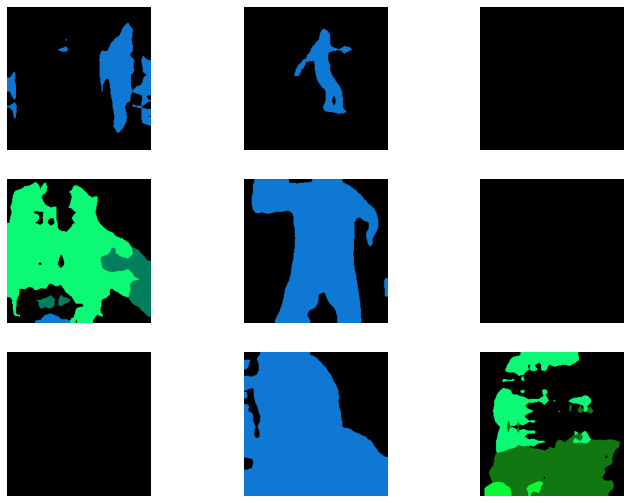

In [ ]:
import numpy as np

palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

r = output_predictions.byte().cpu().numpy()

images = []
for x in r:
    im = Image.fromarray(x) 
    im.putpalette(colors)
    images.append(im)
    print(set(np.asarray(im).ravel()))
    
plot_images(images)

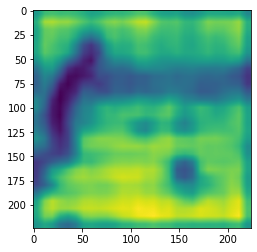

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(Y['out'][0,0].detach().numpy())